# 1. Giới thiệu về Multitask learning



## 1.1 Khái niệm multitask learning

Các bài toán phân loại thông thường của classification có một hạn chế đó là với mỗi ảnh đầu vào chúng ta chỉ dự đoán được một nhãn duy nhất cho ảnh. Tuy nhiên trên thực thế có thể xuất hiện nhiều hơn 1 nhãn trên ảnh.

![](https://imgur.com/PUgGSG8.png)

**Hình 1:** Kết quả trả về của thuật toán image classification chỉ cho phép đưa ra 1 nhãn/ảnh. Trong khi hình ảnh thực tế là nhiều hơn 1 nhãn/ảnh.
Source: [AICode web - Khanh blog](https://aicode.herokuapp.com/).

Yêu cầu thực tiễn đã phát sinh nhu cầu về một thuật toán cho phép thực hiện nhiều nhiệm vụ đồng thời nhưng chỉ sử dụng một mạng neural duy nhất. Mỗi một nhiệm vụ sẽ bổ trợ cho những nhiệm vụ còn lại trong quá trình dự báo. Đó chính là học đa nhiệm multitask learning. Hãy cùng hiểu hơn thông qua ví dụ:


## 1.2. Ví dụ multitask learning

* Trong lĩnh vực xe tự hành, chúng ta phải nhận biết nhiều vật thể khác nhau trên cùng một bức ảnh như: Biển báo giao thông, vạch kẻ đường, người đi bộ, đèn giao thông, các loại phương tiện,....

* Trong lĩnh vực thời trang (mà chúng ta sẽ thực hiện ở phần thực hành) chúng ta cần phân biệt đồng thời loại sản phẩm thời trang kèm theo các đặc tính về màu sắc sản phẩm (xanh, đỏ, tím, vàng, ...), giới tính (nam, nữ), độ tuổi (người già, thanh niên, trẻ em), mùa (trang phục mùa đông, mùa hạ, ....).

Như vậy chúng ta cần sử dụng Multitask learning để thực hiện nhiều tác vụ phân loại khác nhau trên cùng một ảnh đầu vào để nhận biết xem chúng có thực sự xuất hiện hay không.



# 2. Tìm hiểu về Multitask Learning

## 2.1. Kiến trúc thuật toán multitask learning

Ở bài trước chúng ta đã được tìm hiểu về [transfer learning](https://phamdinhkhanh.github.io/2020/04/15/TransferLearning.html). Kiến trúc của multitask learning về cơ bản cũng tương tự như multitask learning và bao gồm 2 phrases:

* **Phrase 1**: Base network có tác dụng làm nhiệm vụ trích lọc đặc trưng (feature extractor). Lưu ý trong thuật toán multitask learning thì feature extractor sẽ tạo ra output là những đặc chưng chung cho toàn bộ các tác vụ.

* **Phrase 2**: Từ đặc trưng chung được trích suất từ **phrase 1**, chúng ta áp dụng chúng vào $C$ thuật toán phân loại nhị phân (Binary Classification) khác nhau. Output của chúng ta sẽ bao gồm nhiều units (multi-head) mà mỗi unit sẽ tính toán khả năng xảy ra của một tác vụ phân loại nhị phân. Ví dụ output unit thứ $j$ là output của tác vụ phân loại nhị phân thứ $j$.

![](https://imgur.com/uO99I8j.png)

**Hình 2:** Kiến trúc của một mạng multitask learning.











## 2.2. Mã hóa output cho Multitask learning

Giả sử chúng ta đang xây dựng một thuật toán multitask learning huấn luyện đồng thời 2 nhiệm vụ là phân loại sản phẩm thời trang và màu sắc của sản phẩm.

Chúng ta có 3 nhãn thời trang lần lượt là: `{dress, jean, shirt}`
và 2 nhãn màu sắc lần lượt là: `{black, blue, red}`.

Thuật toán multitask learning sẽ học đồng thời 6 tác vụ phân loại nhị phân trên một bức ảnh đầu vào bao gồm phân loại:
* Có xuất hiện dress trong ảnh hay không?
* Có xuất hiện jean trong ảnh hay không?
...
* Có xuất hiện mày xanh trong ảnh hay không?
* Có xuất hiện màu đỏ trong ảnh hay không?

Để thực hiện huấn luyện 6 tác vụ huấn luyện binary classification đồng thời chúng ta sẽ one-hot encoding theo cả 2 yếu tố loại sản phẩm và màu sắc và sau đó concatenate véc tơ embedding lại với nhau. Như vậy một véc tơ output sẽ có 2 giá trị bằng 1 (một giá trị cho loại sản phẩm và một giá trị cho màu sắc).

Ví dụ: Các tác vụ theo thứ tự là một list: `[dress, jean, shirt, black, blue, red]`.

Một sản phẩm gán nhãn là `blue dress` sẽ được encoding thành véc tơ [1, 0, 0, 0, 1, 0]. Trong đó vị trí thứ 1 và thứ 5 tương ứng với `dress` và `blue` trong list các tác vụ.

Phương pháp encoding nhiều biến category như trên còn được gọi là [Multi label binary encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html).




## 2.3. Multitask learning có gì khác so với transfer learning

Ta có thể thấy multitask learning là quá trình thực hiện nhiều bài toán phân loại nhị phân đồng thời trên cùng một đầu vào. Do đó chúng ta sẽ áp dụng hàm sigmoid để tính phân phối xác suất trên từng sự kiện. Trái lại, transfer learning là một bài toán phân loại với $C$ class nên để tính phân phối xác suất thì hàm softmax sẽ được áp dụng (trong trường hợp $C=2$ thì hàm softmax trở thành hàm sigmoid). Để hiểu hơn về hàm softmax và sigmoid, xem thêm tại [Blog Machine Learning Cơ bản](https://machinelearningcoban.com/2017/02/17/softmax/#-cong-thuc-cua-softmax-function). Cả 2 phương pháp học máy cũng tồn tại sự khác biệt trong hàm loss function mà chúng ta sẽ tìm hiểu ở chương tiếp theo.

## 2.4 Hàm loss function

Chúng ta cùng ôn lại một chút kiến thức cơ bản:

* Đối với bài toán phân loại nhị phân hàm loss function có dạng:

$$\mathcal{L}(\mathbf{y},\hat{\mathbf{y}}) = -\sum_{i = 1}^N (y_{i}.\log(\hat{y}_{i}) + (1-y_{i}).\log(1-\hat{y}_{i}))$$


* Trong trường hợp bài toán phân loại có $C$ nhãn. $C$ nhiều hơn 2 nhãn. Đồng thời chúng ta sử dụng hàm sorfmax để tính phân phối xác suất output thì hàm loss function là một hàm cross entropy như sau:

$$\mathcal{L}(\mathbf{y},\hat{\mathbf{y}}) = -\sum_{i = 1}^N\sum_{j=1}^{C}y_{ij}.\log(\hat{y}_{ij})$$

* Trong thuật toán multitask learning, đối với mỗi một tác vụ phân loại sẽ có giá trị hàm loss function là:

$$\mathcal{L}(\mathbf{y},\hat{\mathbf{y}}) = -\sum_{i = 1}^N (y_{i}.\log(\hat{y}_{i}) + (1-y_{i}).\log(1-\hat{y}_{i}))$$

Như vậy khi có $C$ tác vụ phân loại khác nhau, hàm loss function gộp của chúng sẽ là:

$$\mathcal{L}(\mathbf{y},\hat{\mathbf{y}}) = -\sum_{i = 1}^N\sum_{j=1}^{C}y_{ij}.\log(\hat{y}_{ij})+(1-y_{ij}).\log(1-\hat{y}_{ij})$$


Trong đó $i$ là chỉ số của mẫu, $j$ là chỉ số của từng tác vụ.

Như vậy về bản chất hàm loss function của multitask learning là tổng các loss function (dạng binary cross entropy) của từng bài toán phân loại nhị phân ứng của mỗi một tác vụ.



## 2.5. Lợi ích của multitask learnning

* Tiết kiệm tài nguyên tính toán: Bạn sẽ không cần phải huấn luyện mỗi một nhiệm vụ một mô hình mà có thể sử dụng kết hợp các nhiệm vụ khác nhau trong cùng một mô hình.

* Kết quả từ mô hình multitask learning có độ chính xác cao hơn so với huấn luyện 
từng mô hình riêng lẻ. Nguyên nhân là bởi có sự hỗ trợ từ những nhiệm vụ lẫn nhau. Những kinh nghiệm được học từ những nhiệm vụ này sẽ bổ sung cho nhiệm vụ khác. Chẳng hạn như khi chúng ta thực hiện phân loại thời trang và màu sắc đồng thời. Hầu hết các trường hợp áo sơ mi có màu trắng, quần âu màu đen, giày màu đen. Do đó kinh nghiệm phân loại thời trang sẽ được chia sẻ cho nhiệm vụ phân loại màu sắc.

## 2.6. Sử dụng multitask learning như thế nào cho hiệu quả?

* **Các mô hình có chung đặc trưng**: Trong multitask learning, các mô hình sẽ cùng sử dụng một đặc trưng chung để huấn luyện đồng thời các nhiệm vụ khác nhau. Do đó nếu những đặc trưng giúp phân loại những nhiệm vụ này không cùng tính chất thì mô hình sẽ không đạt độ chính xác cao. Trong bài toán phân loại thời trang và màu sắc thì các đặc trưng của thời trang và các đặc trưng về màu sắc cùng là những thuộc tính trong lĩnh vực thời trang nên có thể cùng được huấn luyện trong multitask learning.

* **Kích thước dữ liệu giữa các class tương tự nhau**:. Giả sử chúng cần phân loại đồng thời 1000 nhiệm vụ khác nhau, mỗi nhiệm vụ nhận biết một class và bao gồm 100 ảnh. Như vậy khi sử dụng multitask learning thì để nhận biết một nhiệm vụ đơn lẻ $T_1$ chúng ta sẽ được hưởng lợi từ 99900 đặc trưng được học từ 999 nhiệm vụ còn lại. 99900 ảnh là một số lượng khá lớn nên các đặc trưng học được sẽ đa dạng hơn và giúp cải thiện nhiệm vụ đơn lẻ $T_1$.

![](https://imgur.com/rc3fV4Q.png)

**Hình 3:** Thuật toán multitask learning hiệu quả khi không xảy ra hiện tượng mất cân bằng mẫu.

Trái lại nếu xảy ra hiện tượng mất cân bằng dữ liệu. Nhiệm vụ $T_1$ chiếm tới 99000 ảnh và các nhiệm vụ còn lại chiếm 1000 ảnh. Như vậy hầu hết các đặc trưng học được từ mạng sẽ chủ yếu mang đặc trưng đặc thù của nhiệm vụ $T_1$ và dễ dẫn tới mô hình dự báo kém trên các nhiệm vụ còn lại.

* **Nên huấn luyện trên một mạng neural kích thước lớn**: Khi số lượng classes càng gia tăng thì khả năng dự báo nhầm class sẽ lớn hơn, do đó độ chính xác dự báo giảm và tỷ lệ nghịch với số lượng classes. Điều này đã được kiểm chứng trong các mô hình object detection. Mô hình multitask learning sẽ huấn luyện trên nhiều classes hơn so với từng mô hình classification. Do đó ta cần sử dụng một kích thước mạng neural lớn hơn để học được nhiều đặc trưng. Từ đó giúp cải thiện độ chính xác trên từng nhiệm vụ.



# 3. Thực hành xây dựng mô hình multitask learning

Trong bài thực hành này chúng ta cùng huấn luyện một mô hình phân loại thời trang nhưng đồng thời dự báo cả màu sắc.

Để hiểu rõ hơn tuần tự các bước ở phần thực hành, các bạn xem ở phần mục lục `Table of contents` bên trái nếu ở trên google colab hoặc phần `Menu` nếu ở trên website `phamdinhkhanh.github.io`.

Phần thực hành của bài viết trên google colab tại [Bài 35 - MultitaskLearning - KhanhBlog](https://colab.research.google.com/drive/1iErI9f8IGtXn1I3qiPbCmXTsJvrDmNQZ)

## 3.1. Dataset

Dữ liệu được sử dụng là bộ dữ liệu về fashion. Các bạn download dữ liệu theo link sau:





In [0]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/MultitaskLearning'
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !mkdir multitaskLearning
%cd multitaskLearning
# !git init
# !git remote add -f origin https://github.com/phamdinhkhanh/khanhBlogTurtorial.git
# !git config core.sparseCheckout true
# !echo "Bai34-multitaskLearning/dataset" >> .git/info/sparse-checkout
# !git pull origin master

/content/gdrive/My Drive/Colab Notebooks/MultitaskLearning/multitaskLearning


In [0]:
!ls 'Bai34-multitaskLearning/dataset'

black_jeans  blue_dress  blue_shirt  red_shirt
black_shirt  blue_jeans  red_dress


Như vậy bộ dữ liệu của chúng ta sẽ bao gồm 7 nhãn có cấu trúc `màu sắc + loại sản phẩm thời trang`. Mỗi nhãn sẽ tương ứng với một nhiệm vụ huấn luyện.

Tiếp theo chúng ta sẽ cùng xem phân phối số quan sát giữa các classes. 

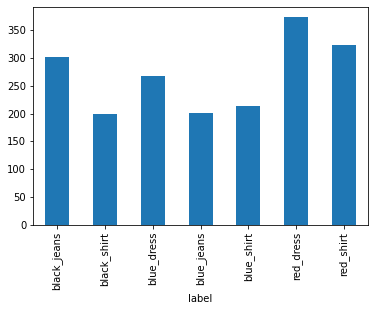

In [0]:
import glob2
import pandas as pd

def _list_images(root_dir, exts = ['.jpg', '.jpeg', '.png']):
  list_images = glob2.glob('Bai34-multitaskLearning'+'/**')
  image_links = []
  for image_link in list_images:
    for ext in exts:
      if ext in image_link[-5:]:
        image_links.append(image_link)
  return image_links

imagePaths = sorted(_list_images(root_dir='Bai34-multitaskLearning'))
labels = [path.split("/")[2] for path in imagePaths]

data = pd.DataFrame({'label': labels, 'source': imagePaths})
data.groupby('label').source.count().plot.bar()

Mặc dù khá đơn giản nhưng khảo sát dữ liệu là bước vô cùng cần thiết trước khi xây dựng mô hình. Bạn đọc nhớ đừng bỏ qua nhé.

Đồ thị cho thấy kích thước mẫu giữa các classes khá đồng đều, mỗi class khoảng 200-370 quan sát. Các classes `blue jeans`, `black shirt` và `blue shirt` có số lượng quan sát ít hơn (từ 200-210). Tuy nhiên số lượng dữ liệu ở mỗi class là đủ lớn để xây dựng mô hình dự báo và không xảy ra hiện tượng mất cân bằng dữ liệu trầm trọng.

## 3.2. Mô hình

Bên dưới mình sẽ tạo ra một mô hình sử dụng chung đầu vào và chia làm hai nhánh, một nhánh phân loại các sản phẩm thời trang và một nhánh phân loại màu sắc. Nhánh thứ nhất (phân loại thời trang) được tạo thông qua hàm `_fashion_base_network()` và nhánh thứ hai (phân loại màu sắc) được tạo thông qua hàm `_color_base_network()`. Do màu sắc ít đặc trưng hơn so với thời trang nên không cần phải sử dụng một mạng neural quá sâu. Độ dài ngắn hơn so với nhánh thứ nhất.

In [0]:
%tensorflow_version 2.x

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, DepthwiseConv2D, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

INPUT_SHAPE = (96, 96, 3)
N_CLASSES = 6

class KhanhBlogNet(object):
  @staticmethod
  def build_model(inputShape = INPUT_SHAPE, classes = N_CLASSES, finAct = 'softmax'):
    # DepthWiseCONV => CONV => RELU => POOL
    inpt = Input(shape=inputShape)
    x = Conv2D(filters=32, kernel_size=(3, 3), 
              padding="same", activation='relu')(inpt)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)

    # (CONV => RELU) * 2 => POOL
    x = Conv2D(filters=64, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # (CONV => RELU) * 4 => POOL
    x = Conv2D(filters=128, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # first (and only) set of FC => RELU layers
    x = Flatten()(x)
    x = Dense(1048, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Activation("relu")(x)

    # softmax classifier
    x = Dense(classes)(x)
    x = Activation(finAct, name="fashion_output")(x)
    model = Model(inputs=[inpt], outputs=[x])
    return model

model = KhanhBlogNet.build_model(inputShape=INPUT_SHAPE, classes=N_CLASSES,  finAct='sigmoid')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0     

Kiến trúc model của `fashion base network` do mình tự thiết kế được lấy ý tưởng từ mô hình VGG16:

* Sử dụng nhiều layers Convolutional 2D liên tiếp nhau trước khi kết nối tới Maxpooling Layer. Kiến trúc block dạng `[[Conv]_n-MaxPool]_m` với $m, n$ là số lần lặp lại của các layers (ý tưởng từ VGG16).

* Sau mỗi layer Convolutional 2D thì output của mạng nơ ron trở nên nhỏ hơn và đồng thời chiều sâu của mạng cũng tăng lên. Việc này là để đảm bảo số lượng các đặc trưng học được ở tầng high-level trở nên đa dạng hơn và có sức mạnh để phân biệt các tác vụ.

* Nhằm giảm thiểu overfitting thì mình áp dụng Dropout layers ở đầu tiên với xác suất 0.25 và cuối cùng với xác suất 0.4. Như vậy số lượng thông tin từ ảnh được truyền vào mạng neural chỉ còn 75% và ở đầu ra thì 60% các đặc trưng được lựa chọn ngẫu nhiên để dự báo output. So với trước khi áp dụng Drop Out thì mô hình của mình đã giảm được hiện tượng overfitting đáng kể. 

* Để tăng tốc độ hội tụ thì mình sử dụng thêm Batch Normalization sau mỗi layer Convolutional 2D.

Với keras thì việc tạo những kiến trúc mạng là không quá khó khăn. Các bạn cũng có thể tự tạo cho mình những kiến trúc dựa trên các ý tưởng sẵn có từ các bài báo. Thậm chí nếu training hiệu quả có thể viết paper.

## 3.3. Huấn luyện mô hình

Để huấn luyện mô hình mình sẽ sử dụng ImageGenerator, bạn đọc xem lại [Bài 32 - Kĩ thuật tensorflow Dataset](https://phamdinhkhanh.github.io/2020/04/09/TensorflowDataset.html#321-s%E1%BB%AD-d%E1%BB%A5ng-imagegenerator) để hiểu thêm về ImageGenerator.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_aug = ImageDataGenerator(rotation_range=25, 
                         width_shift_range=0.1, height_shift_range=0.1, 
                         shear_range=0.2, zoom_range=0.2,
	                       horizontal_flip=True, fill_mode="nearest")

Augumentation sẽ thực hiện các biến đổi:

* Xoay ảnh ngẫu nhiên với một góc tối đa là 25 độ, Đổng thời dịch chuyển ngẫu nhiên theo chiều width và height là 10% kích thước mỗi chiều. 

* Ảnh được phóng đại lên 20% so với kích thước gốc một cách ngẫu nhiên.

* Ảnh được lật theo chiều ngang.

Các phép biến đổi này không bao gồm chuẩn hóa ảnh nên không làm thay đổi độ lớn của các pixels trên ảnh gốc.

Optimizer mình sử dụng là Adam với learning rate được khởi tạo là 0.001. Hệ số learning rate sẽ được điều chỉnh giảm dần theo epochs. Mô hình được huấn luyện trên 50 EPOCHS.

In [0]:
LR_RATE = 0.01
EPOCHS = 50
opt = Adam(lr=LR_RATE, decay=LR_RATE / EPOCHS)

Hàm loss function mà chúng ta sử dụng sẽ là `Binary Cross Entropy`, Bạn đọc đã hiểu lý do vì sao rồi chứ? Xem lại mục `2.4 Hàm loss function`. 

In [0]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Để quá trình huấn luyện được nhanh hơn thì chúng ta không nên sử dụng hàm `flow_from_directory()` của ImageGenerator mà thay vào đó save ảnh và đọc từ numpy. Quá trình huấn luyện sẽ nhanh hơn đáng kể. Tuy nhiên cách này sẽ không hợp lý nếu bộ dữ liệu của bạn lớn hơn nhiều kích thước của RAM. Xem lại [Bài 32 - Kĩ thuật tensorflow Dataset](https://phamdinhkhanh.github.io/2020/04/09/TensorflowDataset.html) để hiểu hơn về các phương pháp truyền dữ liệu vào huấn luyện mô hình.

In [0]:
import cv2
import numpy as np

images = []
labels = []
# Lấy list imagePaths theo từng label
data_sources = data.groupby('label').source.apply(lambda x: list(x))
# data_sources = data_sources[data_sources.index != 'blue_shirt']
for i, sources in enumerate(data_sources):
  np.random.shuffle(list(sources))
  # sources_200 = sources[:200]
  label = data_sources.index[i]
  sources = data_sources[label]
  for imagePath in sources:
    # Đọc dữ liệu ảnh
    image = cv2.imread(imagePath)
    image = cv2.resize(image, INPUT_SHAPE[:2])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image)
    images.append(image)
    # Gán dữ liệu label
    fashion, color = label.split('_')
    labels.append([fashion, color])
  
# Stack list numpy array của ảnh thành một array
images = np.stack(images)
images = images/255.0

Để mô hình hội tụ nhanh hơn thì chúng ta nên chia toàn bộ cường độ các pixels cho 255.

Chúng ta lưu ý rằng mô hình Multitask learning sẽ xử lý nhiều tác vụ đồng thời. Mỗi tác vụ là một bài toán phân loại nhị phân có output là giá trị 0 hoặc 1 đánh dấu hai khả năng xảy ra hoặc không xảy ra của tác vụ. Do đó các label cần được chuyển hóa thành véc tơ binary (chỉ gồm hai giá trị 0 và 1). Trong đó 1 đại diện cho sự kiện tác vụ xảy ra và 0 đại diện cho sự kiện không xảy ra. Bạn có thể sử dụng [MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) của Sklearn để mã hóa nhị phân đa biến output (Multi Label Binary).

In [0]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

mlb = MultiLabelBinarizer()
# One-hot encoding cho fashion
y = mlb.fit_transform(labels)

# Lưu trữ mlb.pkl file
f = open('mlb.pkl', "wb")
f.write(pickle.dumps(mlb))
f.close()
print('classes of labels: ', mlb.classes_)

classes of labels:  ['black' 'blue' 'dress' 'jeans' 'red' 'shirt']


Như vậy các nhãn của chúng ta lần lượt là `['black' 'blue' 'dress' 'jeans' 'red' 'shirt']`. Mỗi nhãn tương ứng với một tác vụ phân loại nhị phân. Chẳng hạn output unit tương ứng với vị trí thứ nhất thuộc về tác vụ `black` nhằm phân biệt màu sắc của sản phẩm có phải là màu đen hay không.

Để dễ hình dung output sau khi mã hóa nhị phân đa biến, chúng ta khảo sát kết quả output tại ảnh thứ nhất:

In [0]:
print(y[0])

[1 1]


Ta thấy giá trị 1 tại vị trí 1 (black) và 4 (jeans). Như vậy ảnh của chúng ta là một chiếc `black jeans`.

Chúng ta có thể visualize để kiểm chứng.

(-0.5, 95.5, 95.5, -0.5)

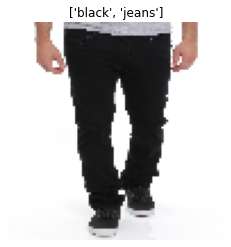

In [0]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.title(labels[0])
plt.axis('Off')

### 3.3.1. Phân chia tập train/validation

Tập train và validation được phân chia theo tỷ lệ `80/20` một cách ngẫu nhiên.



In [0]:
from sklearn.model_selection import train_test_split

(X_train, X_val, y_train, y_val) = train_test_split(images, y, 
                                                    test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1504, 96, 96, 3) (1504, 6)
(376, 96, 96, 3) (376, 6)


Tập train được sử dụng cho nhiệm vụ huấn luyện và validation được sử dụng để kiểm định mô hình.

### 3.3.2. Huấn luyện mô hình

Bạn đọc có thể huấn luyện ngay từ đầu hoặc download [Pretrained-model Fashion Multitask Learning](https://drive.google.com/file/d/1yYJPG7TGI_U39opRCX5wJKtz5PwN07v1/view?usp=sharing) và load lại model theo lệnh bên dưới.

In [0]:
model.load_weights('model_fashion_multitask_learning.h5')

Tiếp theo huấn luyện mô hình

In [0]:
BATCH_SIZE = 32

history = model.fit(
	image_aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
	validation_data=(X_val, y_val),
	steps_per_epoch=len(X_train) // BATCH_SIZE,
	epochs=EPOCHS, verbose=1)

Epoch 1/50
47/47 [==============================] - 95s 2s/step - loss: 7.8182 - accuracy: 0.3916 - val_loss: 1985.9877 - val_accuracy: 0.1090
Epoch 2/50
47/47 [==============================] - 92s 2s/step - loss: 1.0142 - accuracy: 0.3457 - val_loss: 121.3954 - val_accuracy: 0.0505
Epoch 3/50
47/47 [==============================] - 92s 2s/step - loss: 0.4900 - accuracy: 0.5246 - val_loss: 15.2023 - val_accuracy: 0.1676
Epoch 4/50
47/47 [==============================] - 92s 2s/step - loss: 0.3517 - accuracy: 0.6350 - val_loss: 1.1585 - val_accuracy: 0.4521
Epoch 5/50
47/47 [==============================] - 93s 2s/step - loss: 0.3265 - accuracy: 0.6955 - val_loss: 0.3771 - val_accuracy: 0.4947
Epoch 6/50
47/47 [==============================] - 91s 2s/step - loss: 0.2739 - accuracy: 0.6562 - val_loss: 0.2703 - val_accuracy: 0.5293
Epoch 7/50
47/47 [==============================] - 95s 2s/step - loss: 0.2533 - accuracy: 0.6995 - val_loss: 0.3467 - val_accuracy: 0.5479
Epoch 8/50
47/

Quá trình huấn luyện mất khoảng 30 phút. Sau đó đừng quên save lại model.

In [0]:
model.save('model_fashion_multitask_learning.h5')

In [0]:
model.evaluate(X_val, y_val, batch_size=32, use_multiprocessing=True)

12/12 [==============================] - 5s 376ms/step - loss: 0.0520 - accuracy: 0.6968


[0.05196894705295563, 0.6968085169792175]

# 4. Dự báo thời trang

Cuối cùng không thể thiết là kiếm chứng lại kết quả dự báo mô hình bằng một vài hình ảnh trên mạng.

In [0]:
import requests

def _downloadImage(url):
  resp = requests.get(url)
  img = np.asarray(bytearray(resp.content), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [0]:
def _predict_image(image, model, mlb):
  # Lấy kích thước 3 kênh của image
  (w, h, c) = image.shape
  # Nếu resize width = 400 thì height resize sẽ là
  height_rz = int(h*400/w)
  # Resize lại ảnh để hiện thị 
  output = cv2.resize(image, (height_rz, 400))
  # Resize lại ảnh để dự báo
  image = cv2.resize(image, IMAGE_DIMS[:2])/255.0
  # Dự báo xác suất của ảnh
  prob = model.predict(np.expand_dims(image, axis=0))[0]
  # Trích ra 2 xác suất cao nhất
  argmax = np.argsort(prob)[::-1][:2]
  # Show classes và probability ra ảnh hiển thị
  for (i, j) in enumerate(argmax):
    # popup nhãn và xác suất dự báo lên ảnh hiển thị
    label = "{}: {:.2f}%".format(mlb.classes_[j], prob[j] * 100)
    cv2.putText(output, label, (5, (i * 20) + 15), 
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (225, 0, 0), 2)
  # Hiển thị ảnh dự báo
  plt.figure(figsize=(8, 16))
  plt.axis('Off')
  plt.imshow(output)

Bên dưới là một số ảnh demo thời trang mà thuật toán dự báo. Bạn đọc có thể copy đường link ảnh bất kì trên mạng và trải nghiệm.

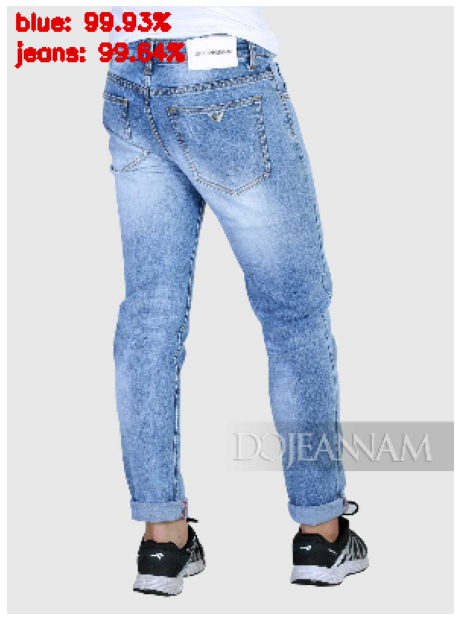

In [0]:
url = 'https://dojeannam.com/wp-content/uploads/2017/07/qu%E1%BA%A7n-jean-nam-wash-b%E1%BA%A1c-tr%E1%BA%AFng-sau.jpg'  
IMAGE_DIMS = (96, 96, 3)

image = _downloadImage(url)
_predict_image(image, model, mlb)

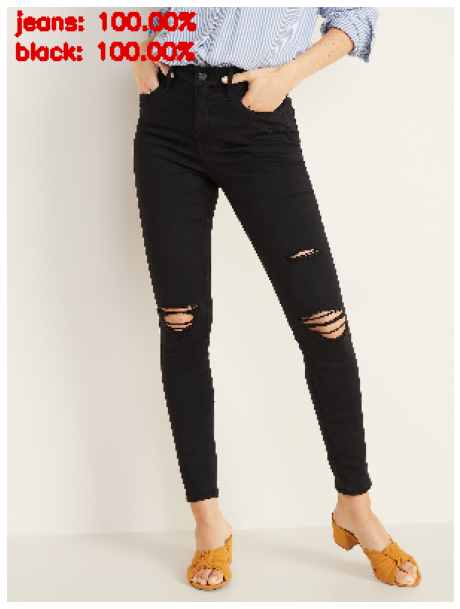

In [0]:
url = 'https://oldnavy.gap.com/webcontent/0017/191/832/cn17191832.jpg'  
IMAGE_DIMS = (96, 96, 3)

image = _downloadImage(url)
_predict_image(image, model, mlb)

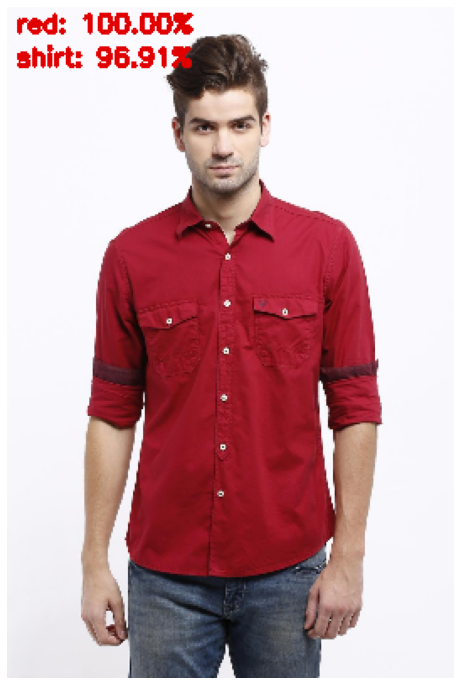

In [0]:
url = 'https://allensolly.imgix.net/img/app/product/8/85181-250173.jpg'  
image = _downloadImage(url)
_predict_image(image, model, mlb)

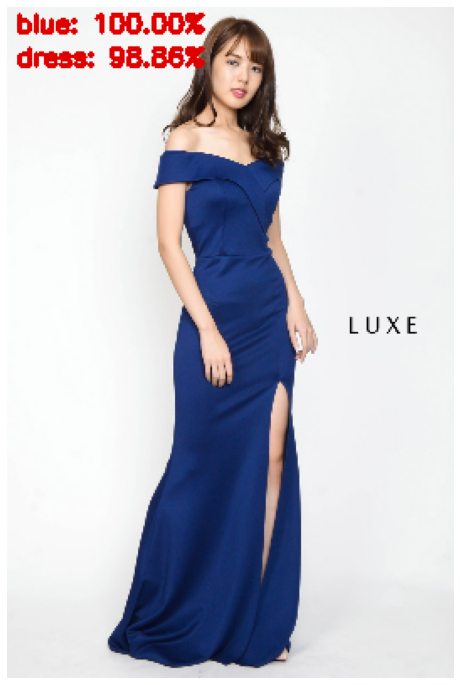

In [0]:
url = 'https://keimag.com.my/image/cache/cache/4001-5000/4432/main/3163-DSC_0557-2c-0-1-0-1-1-800x1200.jpg'  
image = _downloadImage(url)
_predict_image(image, model, mlb)

Thậm chí thuật toán còn có thể dự đoán được những nhãn không có trong huấn luyện như `black dress`.

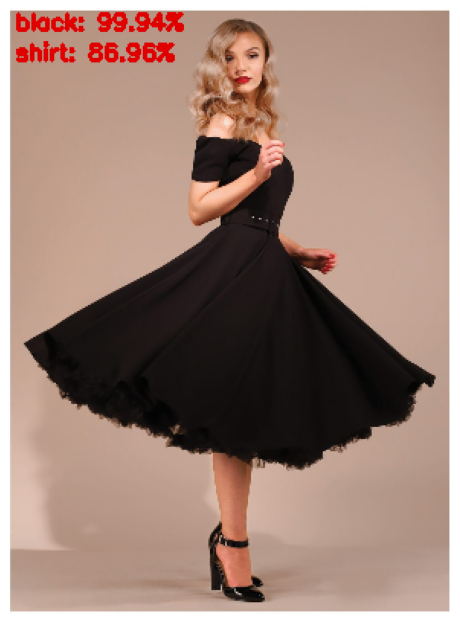

In [0]:
url = 'https://www.britishretro.co.uk/wp-content/uploads/2018/12/50s-black-swing-dress-001.jpg'
image = _downloadImage(url)
_predict_image(image, model, mlb)

Hoặc một chiếc `blue shirt` chưa từng có trước đó trong tập huấn luyện

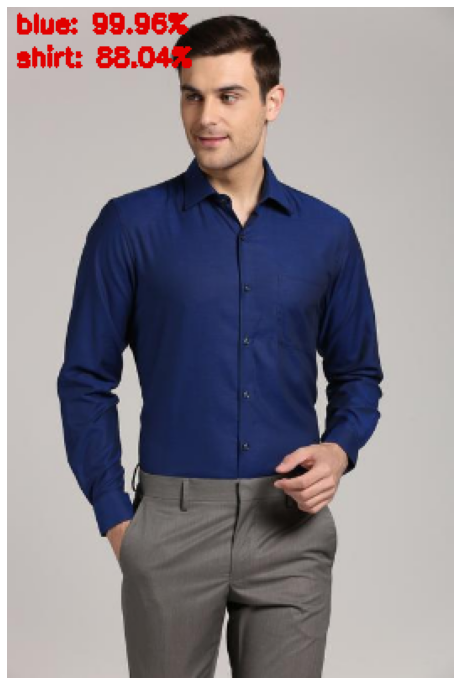

In [0]:
url = 'https://assets.abfrlcdn.com/img/app/product/3/317578-1475149-large.jpg'
image = _downloadImage(url)
_predict_image(image, model, mlb)

# 5. Tổng kết

Như vậy qua bài viết này bạn đã hiểu được kiến thức cơ bản về thuật toán Multitask Learning, trường hợp áp dụng thực tiễn và đồng thời được thực hành huấn luyện một mô hình dự báo sản phẩm thời trang.

Trên thực tế, tôi đã áp dụng Multitask Learning vào rất nhiều các bài toán của mình. Trong đó bao gồm xây dựng mô hình Fashion Image Search cho start up của tôi.

Xung quanh Multitask Learning còn rất nhiều các ứng dụng thực tiễn khác mà bạn đọc có thể thực hiện sau bài viết này.

Để thực hiện bài viết, không thể thiếu là các tài liệu mà tôi đã tham khảo.

# 6. Tài liệu

1. [Multitask Learning - Andrew Ng - Youtube](https://www.youtube.com/watch?v=UdXfsAr4Gjw)

2. [Tesla Autopilot and Multi-Task Learning for Perception and Prediction - Andrej Karpathy - Youtube](https://www.youtube.com/watch?v=IHH47nZ7FZU)

3. [Multitask learning: teach your AI more to make it better - Alexandr Honchar
](https://towardsdatascience.com/multitask-learning-teach-your-ai-more-to-make-it-better-dde116c2cd40)

4. [An Overview of Multi-Task Learning in Deep Neural Networks](https://ruder.io/multi-task/)

5. [PyImagesearch - multi label classification with keras](https://www.pyimagesearch.com/2018/05/07/multi-label-classification-with-keras/)